## Curso y comision: Data Science 1950
## Tutor: Gustavo Bitocchi 

---

## Importar librerias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter
from IPython.display import display, Markdown

## Setup

In [3]:
CSV_PATH = "car_features.csv"

In [4]:
df = pd.read_csv(CSV_PATH)

In [5]:
#Seteamos el tema para seaborn
sns.set_theme(style="whitegrid")

## Entendimiento de los datos

In [6]:
#Revisamos las primeras filas del dataset para ver que datos tiene adentro
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [7]:
df.describe().round(3)

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000,11845.000,11884.000,11908.000,11914.000,11914.000,11914.000,11914.000
mean,2010.384,249.386,5.629,3.436,26.637,19.733,1554.911,40594.737
std,7.580,109.192,1.781,0.881,8.863,8.988,1441.855,60109.104
min,1990.000,55.000,0.000,2.000,12.000,7.000,2.000,2000.000
25%,2007.000,170.000,4.000,2.000,22.000,16.000,549.000,21000.000
50%,2015.000,227.000,6.000,4.000,26.000,18.000,1385.000,29995.000
75%,2016.000,300.000,6.000,4.000,30.000,22.000,2009.000,42231.250
max,2017.000,1001.000,16.000,4.000,354.000,137.000,5657.000,2065902.000


In [8]:
#Mostramos la forma del dataset
df.shape

(11914, 16)

In [9]:
#Mostramos la informacion general relacionada al dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [10]:
#Listamos todas las columnas del dataframe
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [11]:
#Mostramos los typos de datos de cada columna
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [12]:
#Revisamos si las columnas tiene missing values
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

## Resumen de los datos

Los datos se relacionan a la industria automotriz. Cuenta con 11914 observaciones y 16 variables. Nuestro dataset cuenta con valores missings en las variables *Engine Fuel Type, Engine HP, Engine Cylinders, Market Category* 

### Detalle de las variables

- make : fabricante del auto
- model : modelo del auto
- year : año de frabricacion del auto
- engine_fuel_type : tipo de combustible que necesita
- engine_hp : caballos de fuerza del motor
- engine_cilynders : numeros de cilindro en el motor
- transmission_type : tipo de transmision del auto
- driven_wheels : rueda motriz, la que transmite la fuerza (delantera, trasera, o todas)
- numbers_of_doors : número de puertas que tiene el auto
- market_category : categoría de venta del auto
- vehicle_size : categoria de tamaño del auto
- vehicle_style : estilo del auto
- highway_mpg : millas por galon en la carretera
- city_mpg : millas por galon en la carretera
- popularity : numero de veces que se menciono en twitter
- msrp : precio sugerido por el fabricante

# Analisis univariado 

## Funciones

Se crean funciones para no repetir codigo y simplificar el analisis univariado de cada variable

In [13]:
def univ_hisplot(df,col_name,ax):
    """ Grafico histograma con linea de densidad asociad """
    plot0=sns.histplot(data = df,x =col_name, ax=ax,color='green', kde=True)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.set_title(f'Distribution of {col_name}',fontdict={'fontsize':8})
    ax.set_xlabel(col_name,fontdict={'fontsize':7})
    ax.set_ylabel(r'Count/Dist.',fontdict={'fontsize':7})
    plt.tight_layout()

In [14]:
def univ_boxplot(df,col_name,ax):
    """ Diagrama de cajas"""
    plot1=sns.boxplot(data = df[df[col_name]!=0][col_name],ax=ax,orient='v')
    ax.set_title('Box plot',fontdict={'fontsize':8})
    ax.set_ylabel(col_name,fontdict={'fontsize':7})
    plt.tight_layout()

In [15]:
def univ_violinplot(df,col_name,ax):
    """Grafico de violin"""
    plot2=sns.violinplot(x = df[df[col_name]!=0][col_name],ax=ax,palette="Set1")
    ax.set_title('Violin Plot',fontdict={'fontsize':8})
    ax.set_xlabel(col_name,fontdict={'fontsize':7})
    plt.tight_layout()

In [16]:
def plots_univariate_analysis(dataframe,column_name):
    """Grafica histograma, digrama de cajas y grafico de violina para colum_name"""
    fig,axes = plt.subplots(nrows=1,ncols=3,dpi=120,figsize = (10,5))
    fig.suptitle('Graficos para analisis univariados')
    univ_hisplot(dataframe,column_name,axes[0])
    univ_boxplot(dataframe,column_name,axes[1])
    univ_violinplot(dataframe,column_name,axes[2])
    plt.show()

In [17]:
def freq_dist(df, col_name):
    """Arma la tabla de distribucion de frecuencias de col_name"""
    frec_df = df[col_name].value_counts().reset_index().rename(columns={col_name: 'frec_abs',
                                                                        'index': col_name}).sort_values(col_name)
    frec_df['frec_abs_acum'] = frec_df['frec_abs'].cumsum()
    frec_df['frec_rel_%'] = round(100 * frec_df['frec_abs']/len(df[col_name]), 4)
    frec_df['frec_rel_%_acum'] = frec_df['frec_rel_%'].cumsum()
    display(frec_df)
    

In [18]:
def univariate_analysis(dataframe, column_name):
    """Muestra el analisis univariado para column_name :
        -Descripcion estadistica de colum_name
        -Histograma, diagrama de cajas, y grafico de violin de column_name
        -Tabla de distribucion de frecuencias"""
    display(Markdown(f'### Descripcion de la columna {column_name} '))
    
    print(dataframe[column_name].describe().round(3))
    plots_univariate_analysis(dataframe,column_name)
    
    display(Markdown('### Distribucion de frequencias '))
    freq_dist(dataframe,column_name)
    
    

---

### Analisis univariado de variables numéricas

Revisamos la correlacion entre las variables para elegir las que mayor indice de correlacion tienen.

In [19]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
Year,1.000000,0.351794,-0.041479,0.263787,0.258240,0.198171,0.073049,0.227590
Engine HP,0.351794,1.000000,0.779988,-0.102713,-0.406563,-0.439371,0.037501,0.662008
Engine Cylinders,-0.041479,0.779988,1.000000,-0.140088,-0.621606,-0.600776,0.041145,0.531312
Number of Doors,0.263787,-0.102713,-0.140088,1.000000,0.118570,0.120881,-0.048272,-0.126635
highway MPG,0.258240,-0.406563,-0.621606,0.118570,1.000000,0.886829,-0.020991,-0.160043
city mpg,0.198171,-0.439371,-0.600776,0.120881,0.886829,1.000000,-0.003217,-0.157676
Popularity,0.073049,0.037501,0.041145,-0.048272,-0.020991,-0.003217,1.000000,-0.048476
MSRP,0.227590,0.662008,0.531312,-0.126635,-0.160043,-0.157676,-0.048476,1.000000


Podemos ver que:
- *highway MPG* se correlaciona mucho con *city mpg* 
- *MSRP* se corrleaciona con *Engine Cylinders* y *Engine HP* y un poco con *Year*

**Observaciones**
A priori uno pensaría que la popularidad tendria una correlación con el precio, pero segun esta tabla, no. Aun tenemos que trabajar con las variables en el proceso de data wrangling

### Descripcion de la columna Popularity 

count    11914.000
mean      1554.911
std       1441.855
min          2.000
25%        549.000
50%       1385.000
75%       2009.000
max       5657.000
Name: Popularity, dtype: float64


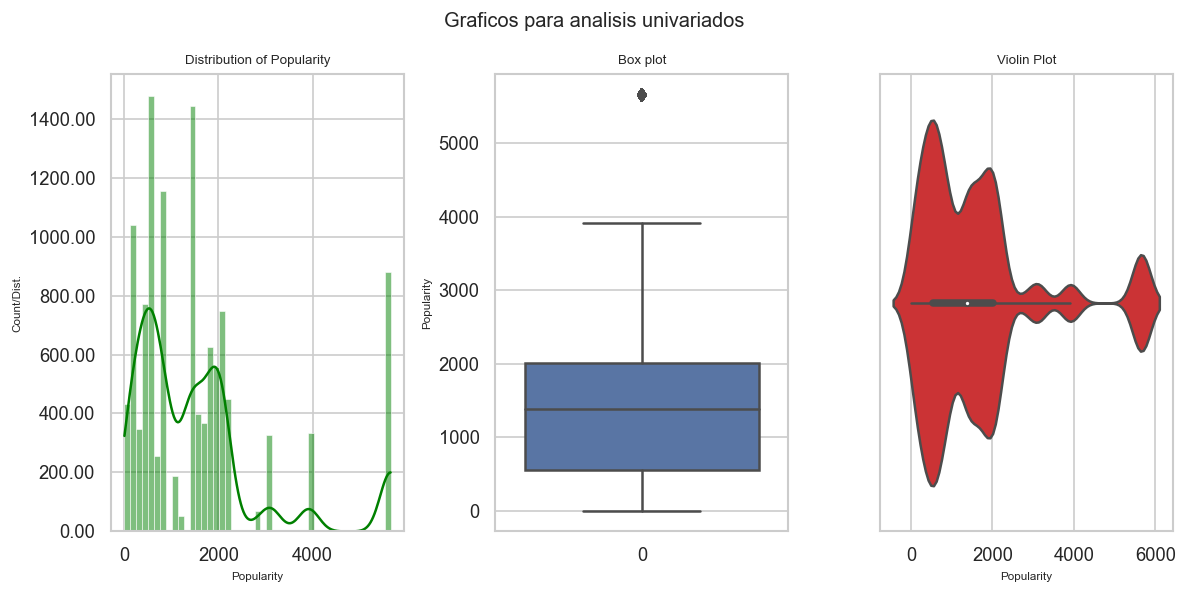

### Distribucion de frequencias 

,Popularity,frec_abs,frec_abs_acum,frec_rel_%,frec_rel_%_acum
45,2,3,3,0.0252,0.0252
46,21,3,6,0.0252,0.0504
26,26,150,156,1.2590,1.3094
25,61,164,320,1.3765,2.6859
42,67,16,336,0.1343,2.8202
38,86,31,367,0.2602,3.0804
35,105,60,427,0.5036,3.5840
43,113,5,432,0.0420,3.6260
41,130,17,449,0.1427,3.7687
22,155,196,645,1.6451,5.4138


In [20]:
univariate_analysis(df,'Popularity')

La distribución de la variable 'Popularity' no es normal, tiene bastantes picos y es poco uniforme.
Viendo el boxplot podemos ver que la media se encuentra cercarno a los 1300 y que podriamos tener un outlier

### Descripcion de la columna highway MPG 

count    11914.000
mean        26.637
std          8.863
min         12.000
25%         22.000
50%         26.000
75%         30.000
max        354.000
Name: highway MPG, dtype: float64


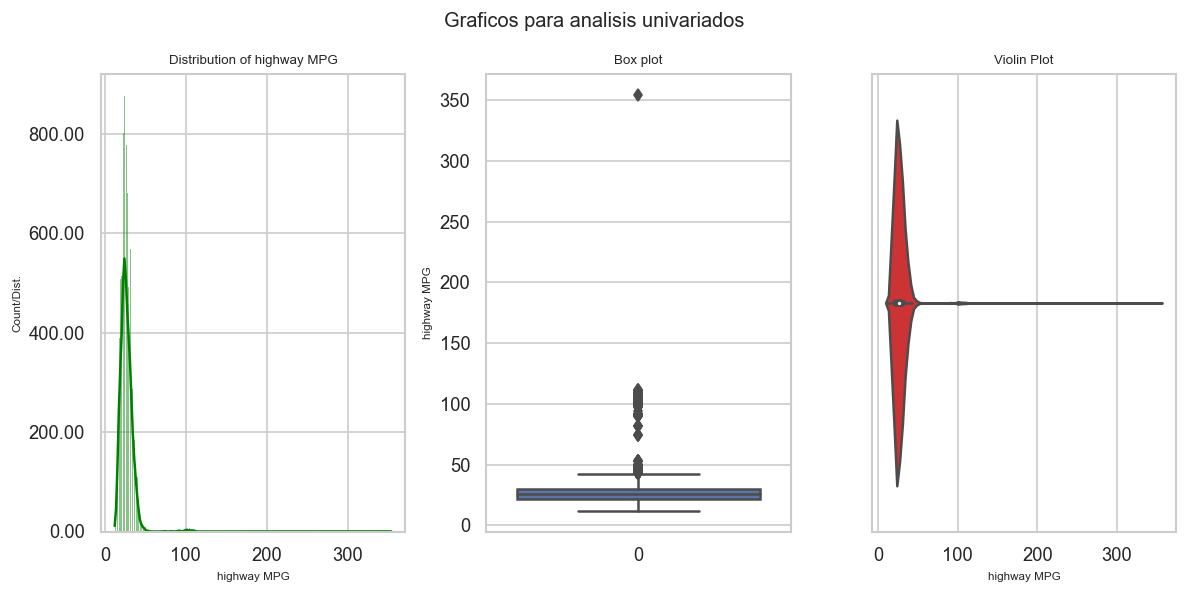

### Distribucion de frequencias 

,highway MPG,frec_abs,frec_abs_acum,frec_rel_%,frec_rel_%_acum
38,12,7,7,0.0588,0.0588
30,13,25,32,0.2098,0.2686
28,14,42,74,0.3525,0.6211
23,15,129,203,1.0828,1.7039
20,16,220,423,1.8466,3.5505
13,17,413,836,3.4665,7.0170
15,18,390,1226,3.2735,10.2905
11,19,508,1734,4.2639,14.5544
9,20,515,2249,4.3226,18.8770
10,21,514,2763,4.3143,23.1913


In [21]:
univariate_analysis(df,'highway MPG')

### Descripcion de la columna city mpg 

count    11914.000
mean        19.733
std          8.988
min          7.000
25%         16.000
50%         18.000
75%         22.000
max        137.000
Name: city mpg, dtype: float64


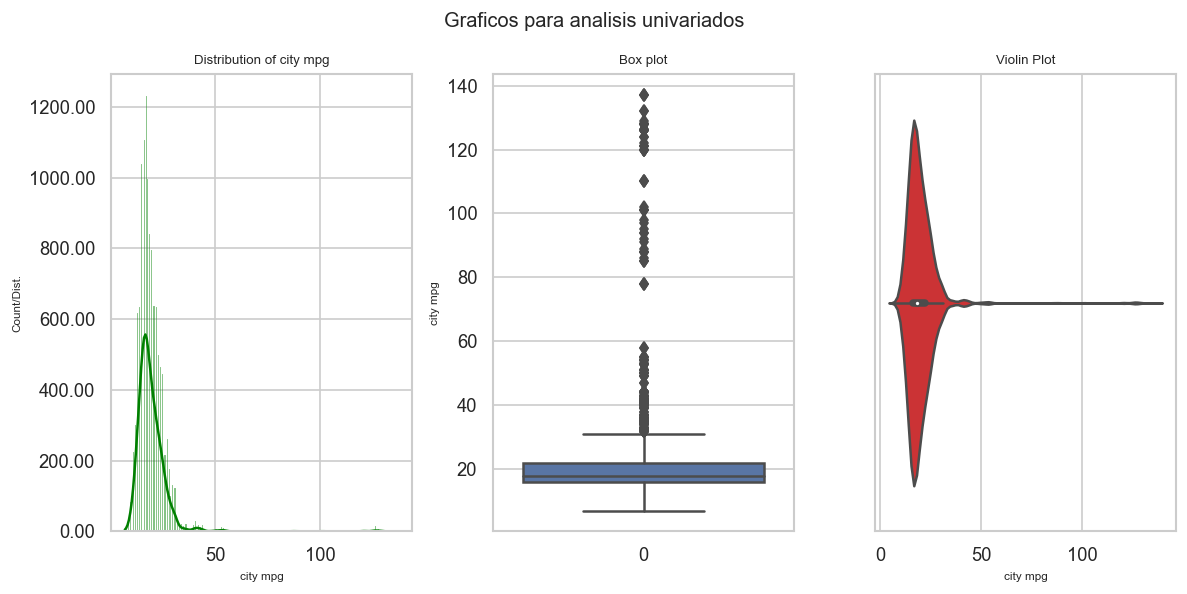

### Distribucion de frequencias 

,city mpg,frec_abs,frec_abs_acum,frec_rel_%,frec_rel_%_acum
65,7,1,1,0.0084,0.0084
36,8,9,10,0.0755,0.0839
22,9,33,43,0.2770,0.3609
21,10,83,126,0.6967,1.0576
15,11,225,351,1.8885,2.9461
...,...,...,...,...,...
32,126,14,11900,0.1175,99.8829
38,128,8,11908,0.0671,99.9500
66,129,1,11909,0.0084,99.9584
56,132,2,11911,0.0168,99.9752


In [22]:
univariate_analysis(df,'city mpg')

La distribucion en la variable 'highway MPG' y 'city mpg' parecen mas normal que la de 'Popularity', lo que podria indicar que el consumo de conbustible en los autos está bien distribuido en general, aunque habria que revisar los outliers que muestran los boxplots respectivos, que parecen ser demasiados.

### Descripcion de la columna Engine HP 

count    11845.000
mean       249.386
std        109.192
min         55.000
25%        170.000
50%        227.000
75%        300.000
max       1001.000
Name: Engine HP, dtype: float64


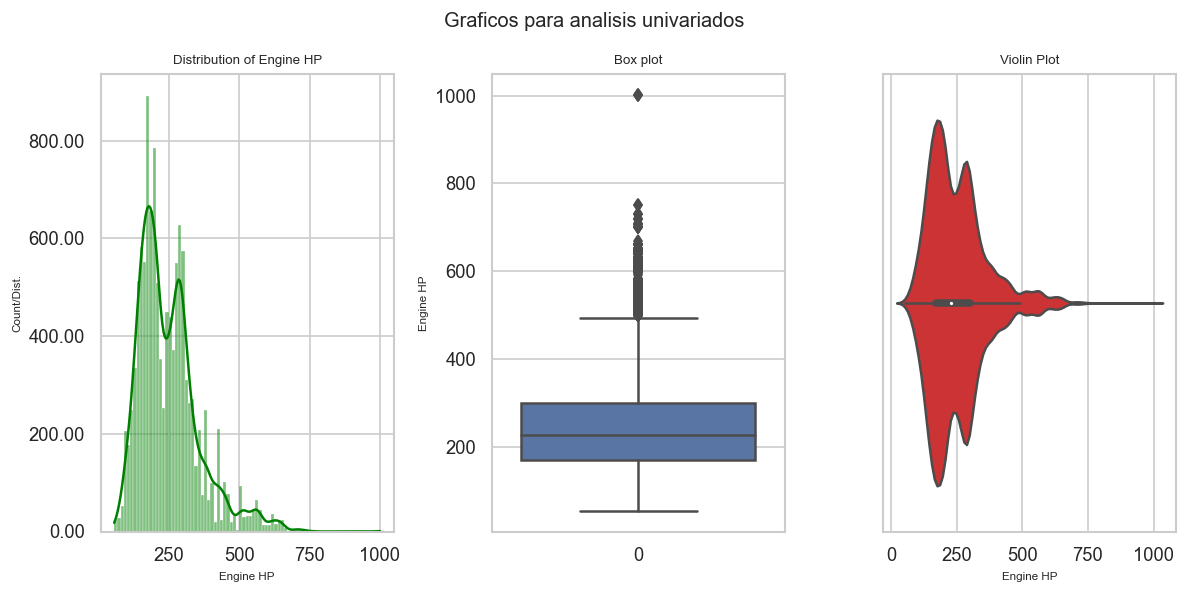

### Distribucion de frequencias 

,Engine HP,frec_abs,frec_abs_acum,frec_rel_%,frec_rel_%_acum
317,55.0,2,2,0.0168,0.0168
319,62.0,2,4,0.0168,0.0336
195,63.0,13,17,0.1091,0.1427
233,66.0,7,24,0.0588,0.2015
220,73.0,9,33,0.0755,0.2770
...,...,...,...,...,...
255,707.0,6,11833,0.0504,99.3218
285,720.0,4,11837,0.0336,99.3554
307,731.0,3,11840,0.0252,99.3806
331,750.0,2,11842,0.0168,99.3974


In [23]:
univariate_analysis(df,'Engine HP')

La variable 'Engine HP'tiene dos picos en los que se distribuen la mayoria de los datos, en general parece bastante normal, salvo por esos dos picos. Lo que muestra hacia la derecha, y luego se visualiza como outliers en el boxplot, pueden ser los autos de alta gama con mas caballos de fuerza

### Descripcion de la columna Engine Cylinders 

count    11884.000
mean         5.629
std          1.781
min          0.000
25%          4.000
50%          6.000
75%          6.000
max         16.000
Name: Engine Cylinders, dtype: float64


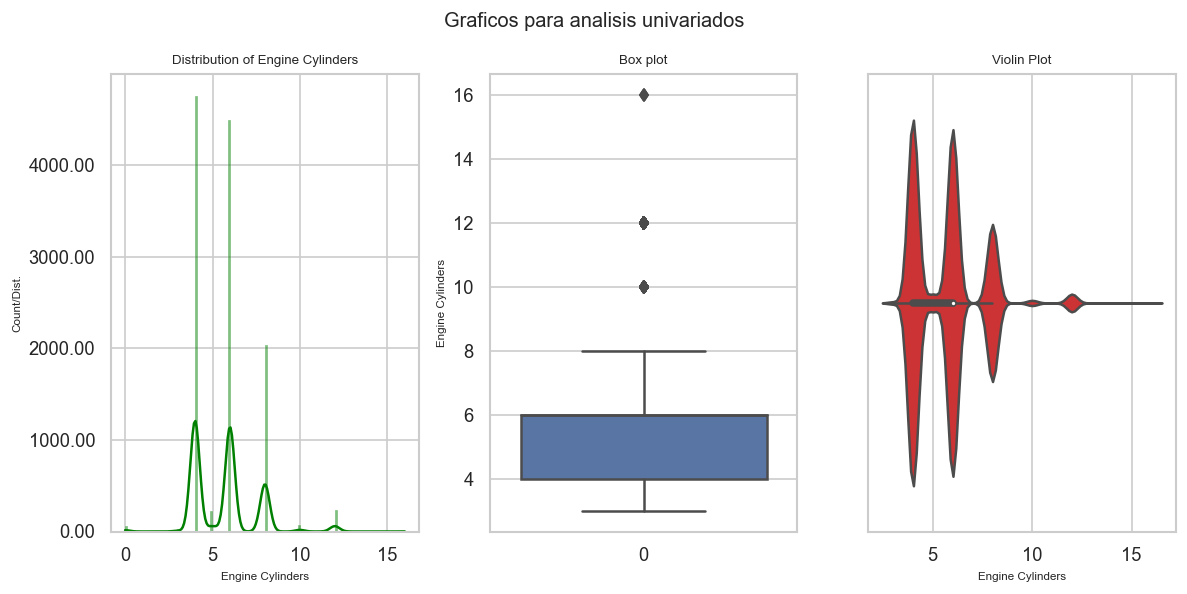

### Distribucion de frequencias 

,Engine Cylinders,frec_abs,frec_abs_acum,frec_rel_%,frec_rel_%_acum
6,0.0,56,56,0.4700,0.4700
7,3.0,30,86,0.2518,0.7218
0,4.0,4752,4838,39.8858,40.6076
4,5.0,225,5063,1.8885,42.4961
1,6.0,4489,9552,37.6784,80.1745
2,8.0,2031,11583,17.0472,97.2217
5,10.0,68,11651,0.5708,97.7925
3,12.0,230,11881,1.9305,99.7230
8,16.0,3,11884,0.0252,99.7482


In [24]:
univariate_analysis(df,'Engine Cylinders')

La variable 'Engine Cylinders' muestra muchos picos en su distribución poco uniforme, lo que podria indicar que los autos que se fabrican tienen un estandar para la cantidad de cilindros con los que compone el motor . Y segun lo que podemos ver del boxplot es que cuenta con tres outliers que tenemos que revisar que podrian ser los autos de alta gama con mas cilindros, aunque tambien tenemos que ver el maximo de cilindros que admite un motor en la actualidad para ver que tan factible son los casos con 10,12 y 16 cilindrios.

### Descripcion de la columna Year 

count    11914.000
mean      2010.384
std          7.580
min       1990.000
25%       2007.000
50%       2015.000
75%       2016.000
max       2017.000
Name: Year, dtype: float64


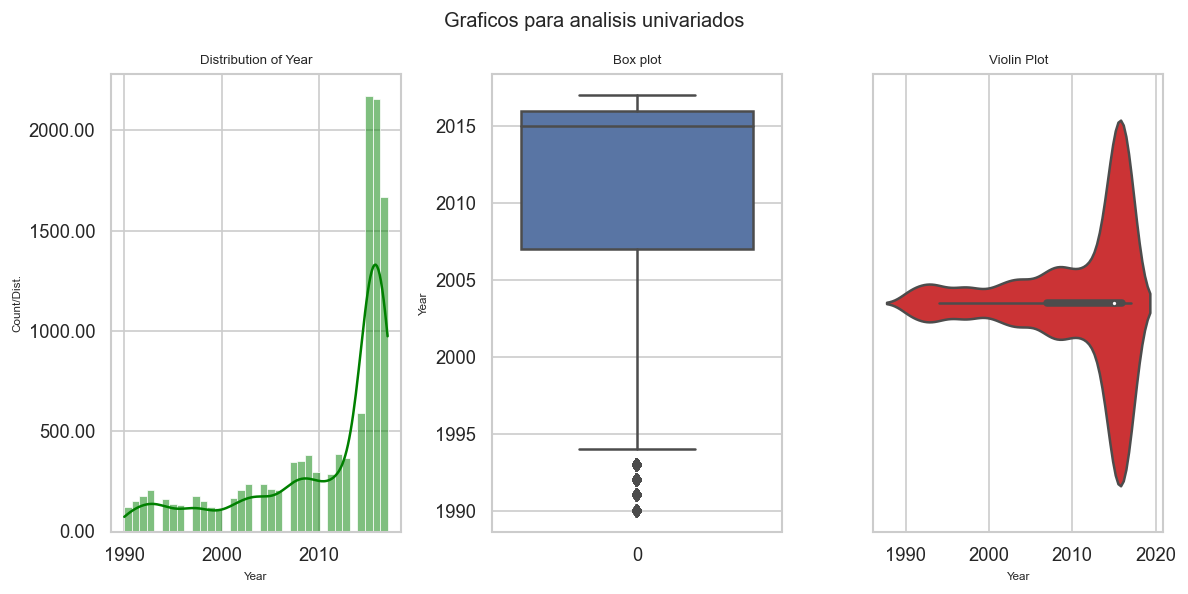

### Distribucion de frequencias 

,Year,frec_abs,frec_abs_acum,frec_rel_%,frec_rel_%_acum
25,1990,123,123,1.0324,1.0324
22,1991,152,275,1.2758,2.3082
17,1992,177,452,1.4856,3.7938
14,1993,209,661,1.7542,5.5480
20,1994,163,824,1.3681,6.9161
23,1995,135,959,1.1331,8.0492
24,1996,131,1090,1.0995,9.1487
18,1997,175,1265,1.4689,10.6176
21,1998,154,1419,1.2926,11.9102
26,1999,120,1539,1.0072,12.9174


In [25]:
univariate_analysis(df,'Year')

La vairiable 'Year' muestra una distribución hacia la derecha lo que indica que la mayor cantidad de autos se construyeron en los ultimos años

### Descripcion de la columna MSRP 

count      11914.000
mean       40594.737
std        60109.104
min         2000.000
25%        21000.000
50%        29995.000
75%        42231.250
max      2065902.000
Name: MSRP, dtype: float64


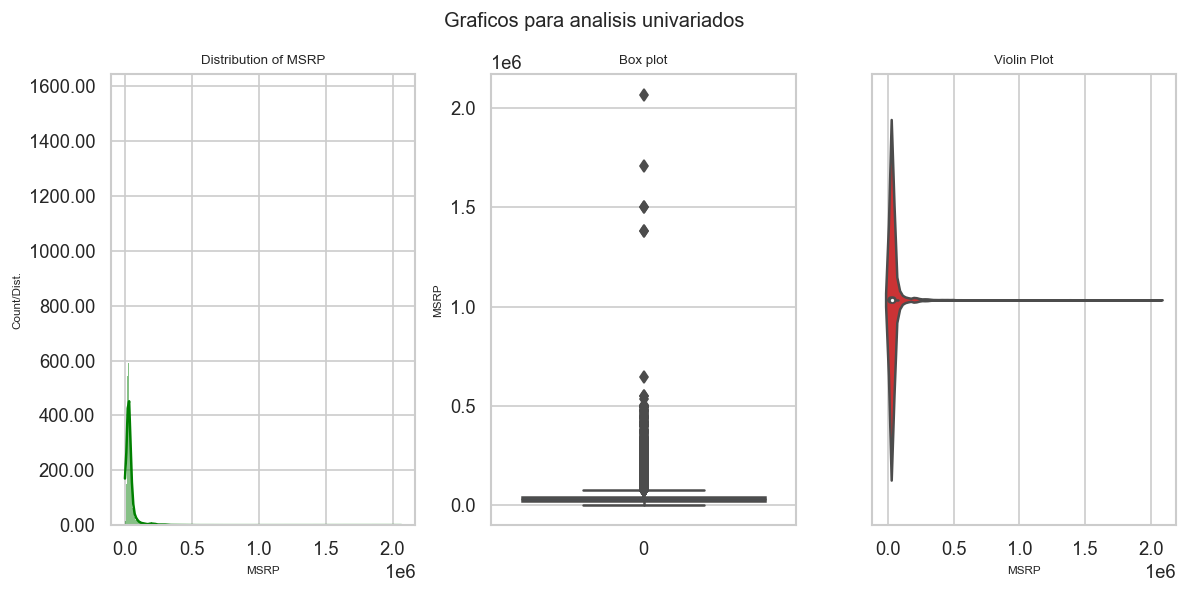

### Distribucion de frequencias 

,MSRP,frec_abs,frec_abs_acum,frec_rel_%,frec_rel_%_acum
0,2000,1036,1036,8.6957,8.6957
3716,2002,1,1037,0.0084,8.7041
2718,2003,1,1038,0.0084,8.7125
1266,2008,2,1040,0.0168,8.7293
3112,2012,1,1041,0.0084,8.7377
...,...,...,...,...,...
5526,1380000,1,11909,0.0084,100.0235
5527,1382750,1,11910,0.0084,100.0319
1503,1500000,2,11912,0.0168,100.0487
3474,1705769,1,11913,0.0084,100.0571


In [26]:
univariate_analysis(df,'MSRP')

Existe una diferencia considerable entre el precio minimo y el maximo. La distribucion no es normal, se muetra recostada sobre la izquierda, mostrando que la mayoría de los autos se encuentran mas cercanos al mínimo en comparación con eñ máximo valor (2065902). El boxplot muestra una gran cantidad de outliers mal distribuidos. Estos podrian ser autos de alta gama o de lujo, pero debe haber poca cantiadad de muestras en esas categorias.